In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets , transforms , models
from torchvision.utils import make_grid
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
import albumentations as A
import cv2
import torch.nn as nn

In [ ]:
if not torch.backends.mps.is_available():
    if not torch.backends.mps.is_built():
        print("MPS not available because the current PyTorch install was not "
              "built with MPS enabled.")
    else:
        print("MPS not available because the current MacOS version is not 12.3+ "
              "and/or you do not have an MPS-enabled device on this machine.")

else:
    mps_device = torch.device("mps")

    # Create a Tensor directly on the mps device
    #x = torch.ones(5, device=mps_device)
    # Or
    #x = torch.ones(5, device="mps")

    # Any operation happens on the GPU
    #y = x * 2

    # Move your model to mps just like any other device
    #model = YourFavoriteNet()
    #model.to(mps_device)

    # Now every call runs on the GPU
    #pred = model(x)

In [ ]:
pip install torch torchvision torchaudio

In [ ]:
train_transform = transforms.Compose([
    #transforms.Grayscale(num_output_channels=1),
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
])

In [ ]:
test_transform = transforms.Compose([
    #transforms.Grayscale(num_output_channels=1),
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
])

In [ ]:
root = '/Users/gmkhan/Documents/06 DCS/Sem3/Computer Vision/Subject Project/CVProject1'
batch_size = 10
train_dataset = datasets.ImageFolder(os.path.join(root,'Train'),transform=train_transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

class_names = train_dataset.classes
print(class_names)

In [ ]:
label_mapping = {'Defect': 1,'NoDefect': 0}

In [ ]:
labels = [label_mapping[label] for  label in labels]

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

root = '/Users/gmkhan/Documents/06 DCS/Sem3/Computer Vision/Subject Project/CVProject1'

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set hyperparameters
num_epochs = 20
batch_size = 10
learning_rate = 0.001


train_dataset = datasets.ImageFolder(os.path.join(root,'Train'),transform=train_transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

# Load the ResNet50 model
model = torchvision.models.resnet50(pretrained=True)

# Parallelize training across multiple GPUs
model = torch.nn.DataParallel(model)

# Set the model to run on the device
model = model.to(device)

# Define the loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
counter = 0

# Train the model...
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        # Move input and label tensors to the device
        inputs = inputs.to(device)
        labels = labels.to(device)
        counter = counter + 1

        # Zero out the optimizer
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()
        
        if (counter % 100 ==0):
            print("Images processed:",counter)
            

    # Print the loss for every epoch
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

print(f'Finished Training, Loss: {loss.item():.4f}')

In [ ]:
torch.save(model.state_dict(), '/Users/gmkhan/Documents/06 DCS/Sem3/Computer Vision/Subject Project/BrightField.pth')


In [ ]:
test_dataset = datasets.ImageFolder(os.path.join(root,'Test'),transform=test_transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True, num_workers=2)

In [ ]:
model1 = model
model1.eval()

In [ ]:
predicted_labels = []
true_labels = []

with torch.no_grad():  # Disable gradient computation for evaluation
    for inputs, labels in test_loader:
        outputs = model1(inputs)
        _, predicted = torch.max(outputs, 1)  # Assuming it's a classification task
        
        predicted_labels.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

predicted_labels = np.array(predicted_labels)
true_labels = np.array(true_labels)
    
    

In [ ]:
accuracy = (predicted_labels == true_labels).mean()
print(f'Accuracy: {accuracy * 100:.2f}%')

In [ ]:
predicted_labels[3]

In [ ]:
true_labels[3]

In [ ]:
for images, labels in train_loader:
        # Move input and label tensors to the device
        #print(inputs)
        print(labels)
        break
        
        
im = make_grid(images,nrow=10)

inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229 , -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)
im_inv = inv_normalize(im)
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im_inv.numpy(),(1,2,0)))

In [ ]:
class_names = train_dataset.classes
print(class_names)

## Rerun with different set up 

In [2]:
train_transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
])

In [3]:
test_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
])

In [4]:
#mps_device = torch.device("mps")
root = '/Users/gmkhan/Documents/06 DCS/Sem3/Computer Vision/Subject Project/CVProject1'
train_data = datasets.ImageFolder(os.path.join(root,'Train'),transform=train_transform)
test_data = datasets.ImageFolder(os.path.join(root,'Test'),transform=test_transform)

torch.manual_seed(42)
batch_size = 10
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2,pin_memory=True,drop_last=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True, num_workers=2,pin_memory=True)

class_names = train_data.classes

print(class_names)
print(f'Training images available: {len(train_data)}')
print(f'Testing images available:  {len(test_data)}')

['Defect', 'NoDefect']
Training images available: 471
Testing images available:  40


In [ ]:
# Grab the first batch of 10 images
for images,labels in train_loader: 
    break

# Print the labels
print('Label:', labels.numpy())
print('Class:', *np.array([class_names[i] for i in labels]))

im = make_grid(images, nrow=10)  # the default nrow is 8

# Inverse normalize the images
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)
im_inv = inv_normalize(im)

# Print the images
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im_inv.numpy(), (1, 2, 0)));

In [ ]:
# Load the ResNet50 model
resnet18 = models.resnet18(pretrained=True)

In [ ]:
resnet18

In [ ]:
for param in resnet18.parameters():
    param.requires_grad = False

In [ ]:
torch.manual_seed(42)
resnet18.fc = nn.Sequential(nn.Linear(512, 256),
                                 nn.ReLU(),
                                 nn.Dropout(0.4),
                                 nn.Linear(256, 2),
                                 nn.LogSoftmax(dim=1))
resnet18

In [ ]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>8}')
    print(f'________\n{sum(params):>8}')

In [ ]:
count_parameters(resnet18)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet18.fc.parameters(), lr=0.001)

In [ ]:
if not torch.backends.mps.is_available():
    if not torch.backends.mps.is_built():
        print("MPS not available because the current PyTorch install was not "
              "built with MPS enabled.")
    else:
        print("MPS not available because the current MacOS version is not 12.3+ "
              "and/or you do not have an MPS-enabled device on this machine.")

else:
    mps_device = torch.device("mps")

In [ ]:
 
import time
start_time = time.time()

epochs = 20

max_trn_batch = 1000
max_tst_batch = 300

train_losses = []
test_losses = []
train_correct = []
test_correct = []
resnet18 = resnet18.to(mps_device)

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        if b == max_trn_batch:
            break
        b+=1
        print("batch:",b)
        # Apply the model
        X_train=X_train.to(mps_device)
        y_train = y_train.to(mps_device)
        
        y_pred = resnet18(X_train)
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print interim results
        if b%47 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/500]  loss: {loss.item():10.8f}  \
            accuracy: {trn_corr.item()*100/(10*b):7.3f}%')

    train_losses.append(loss)
    train_correct.append(trn_corr)

    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            if b == max_tst_batch:
                break
            X_test=X_test.to(mps_device)
            y_test = y_test.to(mps_device)

            # Apply the model
            y_val = resnet18(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

In [ ]:
print(test_correct)
print(f'Test accuracy: {test_correct[-1].item()*100/300:.3f}%')

In [ ]:
torch.save(resnet18.state_dict(), '/Users/gmkhan/Documents/06 DCS/Sem3/Computer Vision/Subject Project/BrightField18.pth')

In [ ]:
train_losses


In [ ]:
cpu_train_losses = [tensor.cpu()  for tensor in train_losses  ]

In [ ]:
cpu_test_losses = [tensor.cpu()  for tensor in test_losses  ]

In [ ]:
l = len(train_losses) 
train_loss_cpu = []
for i in range(0,19):
    
    train_loss_cpu.append(train_losses[i].item())


In [ ]:
plt.plot(train_loss_cpu, label='training loss')
plt.plot(cpu_test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

In [ ]:
train_loss_cpu

In [ ]:
l = len(train_correct) 
train_correct_cpu = []
for i in range(0,l-1):
    
    train_correct_cpu.append(train_correct[i].item())
#train_correct

In [ ]:
test_correct_cpu

In [ ]:
l = len(test_correct) 
test_correct_cpu = []
for i in range(0,l-1):
    
    test_correct_cpu.append(test_correct[i].item())

In [ ]:
plt.plot([t/470 for t in train_correct_cpu], label='training accuracy')
plt.plot([t/40 for t in test_correct_cpu], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();

In [ ]:
PATH = '/Users/gmkhan/Documents/06 DCS/Sem3/Computer Vision/Subject Project/BrightField18.pth'
#model = resnet18(*args, **kwargs)
model = models.resnet18()
#torch.manual_seed(42)
model.fc = nn.Sequential(nn.Linear(512, 256),
                                 nn.ReLU(),
                                 nn.Dropout(0.4),
                                 nn.Linear(256, 2),
                                 nn.LogSoftmax(dim=1))
model.load_state_dict(torch.load(PATH))
model.eval()

In [ ]:
print(type(model))

In [ ]:
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)

In [ ]:
x = 31
im = inv_normalize(test_data[x][0])
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

In [ ]:
test_data[x][0].shape

In [ ]:
with torch.no_grad():
    new_pred = model(test_data[x][0].view(1,3,224,224)).argmax()
print(f'Predicted value: {new_pred.item()} {class_names[new_pred.item()]}')

## Retrain with learning rate update 

In [ ]:
#mps_device = torch.device("mps")
root = '/Users/gmkhan/Documents/06 DCS/Sem3/Computer Vision/Subject Project/CVProject1'
train_data = datasets.ImageFolder(os.path.join(root,'Train'),transform=train_transform)
test_data = datasets.ImageFolder(os.path.join(root,'Test'),transform=test_transform)

torch.manual_seed(42)
batch_size = 10
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2,pin_memory=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True, num_workers=2,pin_memory=True)

class_names = train_data.classes

print(class_names)
print(f'Training images available: {len(train_data)}')
print(f'Testing images available:  {len(test_data)}')

In [ ]:
resnet18_1 = models.resnet18(pretrained=True)
for param in resnet18_1.parameters():
    param.requires_grad = False
    
torch.manual_seed(42)
resnet18_1.fc = nn.Sequential(nn.Linear(512, 256),
                                 nn.ReLU(),
                                 nn.Dropout(0.4),
                                 nn.Linear(256, 2),
                                 nn.LogSoftmax(dim=1))


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet18_1.fc.parameters(), lr=0.01)

In [ ]:
if not torch.backends.mps.is_available():
    if not torch.backends.mps.is_built():
        print("MPS not available because the current PyTorch install was not "
              "built with MPS enabled.")
    else:
        print("MPS not available because the current MacOS version is not 12.3+ "
              "and/or you do not have an MPS-enabled device on this machine.")

else:
    mps_device = torch.device("mps")

In [ ]:
import time
start_time = time.time()

epochs = 30

max_trn_batch = 1000
max_tst_batch = 300

train_losses = []
test_losses = []
train_correct = []
test_correct = []
resnet18_1 = resnet18_1.to(mps_device)

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        if b == max_trn_batch:
            break
        b+=1
        #print("batch:",b)
        # Apply the model
        X_train=X_train.to(mps_device)
        y_train = y_train.to(mps_device)
        
        y_pred = resnet18_1(X_train)
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print interim results
        if b%47 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/471]  loss: {loss.item():10.8f}  \
            accuracy: {trn_corr.item()*100/(10*b):7.3f}%')

    train_losses.append(loss)
    train_correct.append(trn_corr)

    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            if b == max_tst_batch:
                break
            X_test=X_test.to(mps_device)
            y_test = y_test.to(mps_device)

            # Apply the model
            y_val = resnet18_1(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

In [ ]:
l = len(test_correct) 
test_c = 0
for i in range(0,l-1):
    
    test_c = test_c + test_correct[i].item()

print(f'Test accuracy: {(test_c*100)/(40*l):.3f}%')

In [ ]:
l = len(train_losses) 
train_loss_cpu = []
for i in range(0,l-1):
    
    train_loss_cpu.append(train_losses[i].item())

In [ ]:
l = len(test_losses) 
test_loss_cpu = []
for i in range(0,l-1):
    
    test_loss_cpu.append(test_losses[i].item())

In [ ]:

plt.plot(train_loss_cpu, label='training loss')
plt.plot(test_loss_cpu, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

In [ ]:
l = len(train_correct) 
train_correct_cpu = []
for i in range(0,l-1):
    
    train_correct_cpu.append(train_correct[i].item())

In [ ]:
l = len(test_correct) 
test_correct_cpu = []
for i in range(0,l-1):
    
    test_correct_cpu.append(test_correct[i].item())

In [ ]:
plt.plot([t/470 for t in train_correct_cpu], label='training accuracy')
plt.plot([t/40 for t in test_correct_cpu], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();

In [ ]:
torch.save(resnet18_1.state_dict(), '/Users/gmkhan/Documents/06 DCS/Sem3/Computer Vision/Subject Project/BrightField18_1.pth')

## Run with previous learning rate but high resolution input 

In [ ]:
train_transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
])

In [ ]:
test_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
])

In [ ]:
#mps_device = torch.device("mps")
root = '/Users/gmkhan/Documents/06 DCS/Sem3/Computer Vision/Subject Project/CVProject1'
train_data = datasets.ImageFolder(os.path.join(root,'Train'),transform=train_transform)
test_data = datasets.ImageFolder(os.path.join(root,'Test'),transform=test_transform)

torch.manual_seed(42)
batch_size = 10
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2,pin_memory=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True, num_workers=2,pin_memory=True)

class_names = train_data.classes

print(class_names)
print(f'Training images available: {len(train_data)}')
print(f'Testing images available:  {len(test_data)}')

In [ ]:
resnet18_2 = models.resnet18(pretrained=True)
for param in resnet18_2.parameters():
    param.requires_grad = False
    
torch.manual_seed(42)
resnet18_2.fc = nn.Sequential(nn.Linear(512, 256),
                                 nn.ReLU(),
                                 nn.Dropout(0.4),
                                 nn.Linear(256, 2),
                                 nn.LogSoftmax(dim=1))


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet18_2.fc.parameters(), lr=0.001)

In [ ]:
if not torch.backends.mps.is_available():
    if not torch.backends.mps.is_built():
        print("MPS not available because the current PyTorch install was not "
              "built with MPS enabled.")
    else:
        print("MPS not available because the current MacOS version is not 12.3+ "
              "and/or you do not have an MPS-enabled device on this machine.")

else:
    mps_device = torch.device("mps")

In [ ]:
import time
start_time = time.time()

epochs = 30

max_trn_batch = 2000
max_tst_batch = 2000

train_losses = []
test_losses = []
train_correct = []
test_correct = []
resnet18_2 = resnet18_2.to(mps_device)

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        if b == max_trn_batch:
            break
        b+=1
        #print("batch:",b)
        # Apply the model
        X_train=X_train.to(mps_device)
        y_train = y_train.to(mps_device)
        
        y_pred = resnet18_2(X_train)
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print interim results
        if b%47 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/471]  loss: {loss.item():10.8f}  \
            accuracy: {trn_corr.item()*100/(10*b):7.3f}%')

    train_losses.append(loss)
    train_correct.append(trn_corr)

    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            if b == max_tst_batch:
                break
            X_test=X_test.to(mps_device)
            y_test = y_test.to(mps_device)

            # Apply the model
            y_val = resnet18_2(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

In [ ]:
l = len(test_correct) 
test_c = 0
for i in range(0,l-1):
    
    test_c = test_c + test_correct[i].item()

print(f'Test accuracy: {(test_c*100)/(40*l):.3f}%')

In [ ]:
l = len(train_losses) 
train_loss_cpu = []
for i in range(0,l-1):
    
    train_loss_cpu.append(train_losses[i].item())

In [ ]:
l = len(test_losses) 
test_loss_cpu = []
for i in range(0,l-1):
    
    test_loss_cpu.append(test_losses[i].item())

In [ ]:
plt.plot(train_loss_cpu, label='training loss')
plt.plot(test_loss_cpu, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

In [ ]:
l = len(train_correct) 
train_correct_cpu = []
for i in range(0,l-1):
    
    train_correct_cpu.append(train_correct[i].item())

In [ ]:
l = len(test_correct) 
test_correct_cpu = []
for i in range(0,l-1):
    
    test_correct_cpu.append(test_correct[i].item())

In [ ]:
plt.plot([t/470 for t in train_correct_cpu], label='training accuracy')
plt.plot([t/40 for t in test_correct_cpu], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();

In [ ]:
torch.save(resnet18_2.state_dict(), '/Users/gmkhan/Documents/06 DCS/Sem3/Computer Vision/Subject Project/BrightField18_2.pth')

## Try Resnet34

In [ ]:
resnet34 = models.resnet34(pretrained=True)
for param in resnet34.parameters():
    param.requires_grad = False
    
torch.manual_seed(42)
resnet34.fc = nn.Sequential(nn.Linear(512, 256),
                                 nn.ReLU(),
                                 nn.Dropout(0.4),
                                 nn.Linear(256, 2),
                                 nn.LogSoftmax(dim=1))


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet34.fc.parameters(), lr=0.001)

In [ ]:
if not torch.backends.mps.is_available():
    if not torch.backends.mps.is_built():
        print("MPS not available because the current PyTorch install was not "
              "built with MPS enabled.")
    else:
        print("MPS not available because the current MacOS version is not 12.3+ "
              "and/or you do not have an MPS-enabled device on this machine.")

else:
    mps_device = torch.device("mps")
    print("mps allocated ")

In [ ]:
import time
start_time = time.time()

epochs = 100

max_trn_batch = 2000
max_tst_batch = 2000

train_losses = []
test_losses = []
train_correct = []
test_correct = []
resnet34 = resnet34.to(mps_device)

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        if b == max_trn_batch:
            break
        b+=1
        #print("batch:",b)
        # Apply the model
        X_train=X_train.to(mps_device)
        y_train = y_train.to(mps_device)
        
        y_pred = resnet34(X_train)
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print interim results
        if b%47 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/471]  loss: {loss.item():10.8f}  \
            accuracy: {trn_corr.item()*100/(10*b):7.3f}%')

    train_losses.append(loss)
    train_correct.append(trn_corr)

    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            if b == max_tst_batch:
                break
            X_test=X_test.to(mps_device)
            y_test = y_test.to(mps_device)

            # Apply the model
            y_val = resnet34(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

In [ ]:
l = len(test_correct) 
test_c = 0
for i in range(0,l-1):
    
    test_c = test_c + test_correct[i].item()

print(f'Test accuracy: {(test_c*100)/(40*l):.3f}%')

In [ ]:
l = len(train_losses) 
train_loss_cpu = []
for i in range(0,l-1):
    
    train_loss_cpu.append(train_losses[i].item())

In [ ]:
l = len(test_losses) 
test_loss_cpu = []
for i in range(0,l-1):
    
    test_loss_cpu.append(test_losses[i].item())

In [ ]:
plt.plot(train_loss_cpu, label='training loss')
plt.plot(test_loss_cpu, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

In [ ]:
l = len(train_correct) 
train_correct_cpu = []
for i in range(0,l-1):
    
    train_correct_cpu.append(train_correct[i].item())

In [ ]:
l = len(test_correct) 
test_correct_cpu = []
for i in range(0,l-1):
    
    test_correct_cpu.append(test_correct[i].item())

In [ ]:
plt.plot([t/470 for t in train_correct_cpu], label='training accuracy')
plt.plot([t/40 for t in test_correct_cpu], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();

In [ ]:
torch.save(resnet34.state_dict(), '/Users/gmkhan/Documents/06 DCS/Sem3/Computer Vision/Subject Project/BrightField34_1.pth')

### Resnet50

In [5]:
resnet50 = models.resnet50(pretrained=False)
for param in resnet50.parameters():
    param.requires_grad = False
    
torch.manual_seed(42)
resnet50.fc = nn.Sequential(nn.Linear(2048, 512),
                                 nn.ReLU(),
                                 nn.Dropout(0.4),
                                 nn.Linear(512, 2),
                                 nn.LogSoftmax(dim=1))

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet50.fc.parameters(), lr=0.0001)

In [7]:
if not torch.backends.mps.is_available():
    if not torch.backends.mps.is_built():
        print("MPS not available because the current PyTorch install was not "
              "built with MPS enabled.")
    else:
        print("MPS not available because the current MacOS version is not 12.3+ "
              "and/or you do not have an MPS-enabled device on this machine.")

else:
    mps_device = torch.device("mps")

In [8]:
import time
start_time = time.time()

epochs = 200

#max_trn_batch = 2000
#max_tst_batch = 2000

train_losses = []
test_losses = []
train_correct = []
test_correct = []
 

resnet50 = resnet50.to(mps_device)

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
     
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        #if b == max_trn_batch:
         #   break
        b+=1
        #print("batch:",b)
        # Apply the model
        X_train=X_train.to(mps_device)
        y_train = y_train.to(mps_device)
        
        y_pred = resnet50(X_train)
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
         
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print interim results
        if b%47 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/471]  loss: {loss.item():10.8f}  \
            accuracy: {trn_corr.item()*100/(10*b):7.3f}%')

    train_losses.append(loss)
    train_correct.append(trn_corr)
    

    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            #if b == max_tst_batch:
             #   break
            X_test=X_test.to(mps_device)
            y_test = y_test.to(mps_device)

            # Apply the model
            y_val = resnet50(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:  0  batch:   47 [   470/471]  loss: 0.62056226              accuracy:  58.723%
epoch:  1  batch:   47 [   470/471]  loss: 0.70803201              accuracy:  57.872%
epoch:  2  batch:   47 [   470/471]  loss: 0.59716421              accuracy:  60.851%
epoch:  3  batch:   47 [   470/471]  loss: 0.66699588              accuracy:  60.426%
epoch:  4  batch:   47 [   470/471]  loss: 0.84741545              accuracy:  60.000%
epoch:  5  batch:   47 [   470/471]  loss: 0.91977680              accuracy:  57.872%
epoch:  6  batch:   47 [   470/471]  loss: 0.74057370              accuracy:  60.213%
epoch:  7  batch:   47 [   470/471]  loss: 0.67854422              accuracy:  60.000%
epoch:  8  batch:   47 [   470/471]  loss: 0.60571992              accuracy:  63.191%
epoch:  9  batch:   47 [   470/471]  loss: 0.57516873              accuracy:  62.979%
epoch: 10  batch:   47 [   470/471]  loss: 0.59368062              accuracy:  59.362%
epoch: 11  batch:   47 [   470/471]  loss: 0.67351407 

epoch: 96  batch:   47 [   470/471]  loss: 0.56863576              accuracy:  62.128%
epoch: 97  batch:   47 [   470/471]  loss: 0.59830773              accuracy:  63.404%
epoch: 98  batch:   47 [   470/471]  loss: 0.68317693              accuracy:  60.638%
epoch: 99  batch:   47 [   470/471]  loss: 0.77115458              accuracy:  63.191%
epoch: 100  batch:   47 [   470/471]  loss: 0.57920444              accuracy:  60.213%
epoch: 101  batch:   47 [   470/471]  loss: 0.58034718              accuracy:  61.489%
epoch: 102  batch:   47 [   470/471]  loss: 0.75824052              accuracy:  60.426%
epoch: 103  batch:   47 [   470/471]  loss: 0.53442591              accuracy:  61.277%
epoch: 104  batch:   47 [   470/471]  loss: 0.60734546              accuracy:  63.191%
epoch: 105  batch:   47 [   470/471]  loss: 0.66412526              accuracy:  61.489%
epoch: 106  batch:   47 [   470/471]  loss: 0.47161740              accuracy:  61.489%
epoch: 107  batch:   47 [   470/471]  loss: 0.5

epoch: 191  batch:   47 [   470/471]  loss: 0.69230789              accuracy:  61.489%
epoch: 192  batch:   47 [   470/471]  loss: 0.57705796              accuracy:  61.064%
epoch: 193  batch:   47 [   470/471]  loss: 0.70249665              accuracy:  61.915%
epoch: 194  batch:   47 [   470/471]  loss: 0.68275601              accuracy:  62.553%
epoch: 195  batch:   47 [   470/471]  loss: 0.65097940              accuracy:  61.064%
epoch: 196  batch:   47 [   470/471]  loss: 0.59072572              accuracy:  61.702%
epoch: 197  batch:   47 [   470/471]  loss: 0.65409589              accuracy:  61.277%
epoch: 198  batch:   47 [   470/471]  loss: 0.63882434              accuracy:  63.191%
epoch: 199  batch:   47 [   470/471]  loss: 0.48668855              accuracy:  61.915%

Duration: 7720 seconds


In [9]:
def _postprocess(train_losses,test_losses,train_correct,test_correct):
    
    
    
    l = len(train_losses) 
    train_loss_cpu = []
    for i in range(0,l-1):
    
        train_loss_cpu.append(train_losses[i].item())
    
    l = len(test_losses) 
    test_loss_cpu = []
    for i in range(0,l-1):
    
        test_loss_cpu.append(test_losses[i].item())
        
    l = len(train_correct) 
    train_correct_cpu = []
    for i in range(0,l-1):
    
        train_correct_cpu.append(train_correct[i].item())
        
    
    l = len(test_correct) 
    test_c = 0
    for i in range(0,l-1):
    
        test_c = test_c + test_correct[i].item()

    print(f'Test accuracy: {(test_c*100)/(40*l):.3f}%')
    
    
    l = len(test_correct) 
    test_correct_cpu = []
    for i in range(0,l-1):
    
        test_correct_cpu.append(test_correct[i].item())
        
    return train_loss_cpu ,test_loss_cpu , train_correct_cpu ,test_correct_cpu
    
    
    
    
    
    
    

In [10]:
train_loss_cpu,test_loss_cpu,train_correct_cpu,test_correct_cpu = _postprocess(train_losses,test_losses,train_correct,test_correct) 

Test accuracy: 67.675%


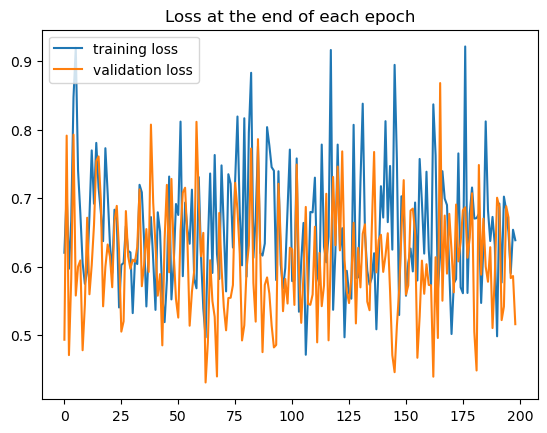

In [11]:
    plt.plot(train_loss_cpu, label='training loss')
    plt.plot(test_loss_cpu, label='validation loss')
    plt.title('Loss at the end of each epoch')
    plt.legend();

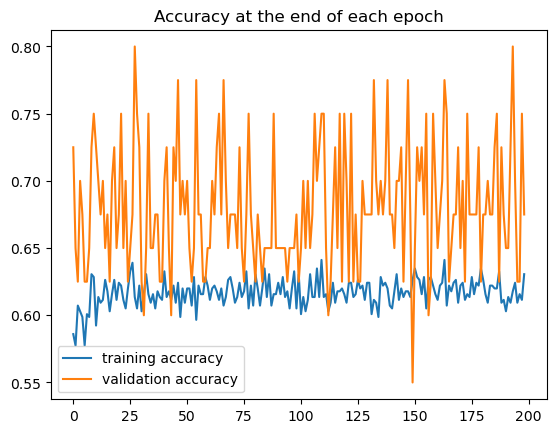

In [12]:
    plt.plot([t/471 for t in train_correct_cpu], label='training accuracy')
    plt.plot([t/40 for t in test_correct_cpu], label='validation accuracy')
    plt.title('Accuracy at the end of each epoch')
    plt.legend();
    

In [13]:
torch.save(resnet50.state_dict(), '/Users/gmkhan/Documents/06 DCS/Sem3/Computer Vision/Subject Project/BrightField50_o.pth')

## Run Resnet18 with higher epocs

In [ ]:
resnet18_3 = models.resnet18(pretrained=True)
for param in resnet18_3.parameters():
    param.requires_grad = False
    
torch.manual_seed(42)
resnet18_3.fc = nn.Sequential(nn.Linear(512, 256),
                                 nn.ReLU(),
                                 nn.Dropout(0.4),
                                 nn.Linear(256, 2),
                                 nn.LogSoftmax(dim=1))

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet18_3.fc.parameters(), lr=0.001)

In [ ]:
if not torch.backends.mps.is_available():
    if not torch.backends.mps.is_built():
        print("MPS not available because the current PyTorch install was not "
              "built with MPS enabled.")
    else:
        print("MPS not available because the current MacOS version is not 12.3+ "
              "and/or you do not have an MPS-enabled device on this machine.")

else:
    mps_device = torch.device("mps")

In [ ]:
import time
start_time = time.time()

epochs = 100

#max_trn_batch = 2000
#max_tst_batch = 2000

train_losses = []
test_losses = []
train_correct = []
test_correct = []


resnet18_3 = resnet18_3.to(mps_device)

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        #if b == max_trn_batch:
         #   break
        b+=1
        #print("batch:",b)
        # Apply the model
        X_train=X_train.to(mps_device)
        y_train = y_train.to(mps_device)
        
        y_pred = resnet18_3(X_train)
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print interim results
        if b%47 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/471]  loss: {loss.item():10.8f}  \
            accuracy: {trn_corr.item()*100/(10*b):7.3f}%')

    train_losses.append(loss)
    train_correct.append(trn_corr)
    

    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            #if b == max_tst_batch:
             #   break
            X_test=X_test.to(mps_device)
            y_test = y_test.to(mps_device)

            # Apply the model
            y_val = resnet18_3(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

In [ ]:
train_loss_cpu,test_loss_cpu,train_correct_cpu,test_correct_cpu = _postprocess(train_losses,test_losses,train_correct,test_correct)

In [ ]:
    plt.plot(train_loss_cpu, label='training loss')
    plt.plot(test_loss_cpu, label='validation loss')
    plt.title('Loss at the end of each epoch')
    plt.legend();

In [ ]:
    plt.plot([t/470 for t in train_correct_cpu], label='training accuracy')
    plt.plot([t/40 for t in test_correct_cpu], label='validation accuracy')
    plt.title('Accuracy at the end of each epoch')
    plt.legend();

In [ ]:
torch.save(resnet18_3.state_dict(), '/Users/gmkhan/Documents/06 DCS/Sem3/Computer Vision/Subject Project/BrightField18_3.pth')

### use Resnet18 with 224 X 224 

In [ ]:
train_transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
])

In [ ]:
test_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
])

In [ ]:
#mps_device = torch.device("mps")
root = '/Users/gmkhan/Documents/06 DCS/Sem3/Computer Vision/Subject Project/CVProject1'
train_data = datasets.ImageFolder(os.path.join(root,'Train'),transform=train_transform)
test_data = datasets.ImageFolder(os.path.join(root,'Test'),transform=test_transform)

torch.manual_seed(42)
batch_size = 10
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2,pin_memory=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True, num_workers=2,pin_memory=True)

class_names = train_data.classes

print(class_names)
print(f'Training images available: {len(train_data)}')
print(f'Testing images available:  {len(test_data)}')

In [ ]:
resnet18_4 = models.resnet18(pretrained=True)
for param in resnet18_4.parameters():
    param.requires_grad = False
    
torch.manual_seed(42)
resnet18_4.fc = nn.Sequential(nn.Linear(512, 256),
                                 nn.ReLU(),
                                 nn.Dropout(0.4),
                                 nn.Linear(256, 2),
                                 nn.LogSoftmax(dim=1))

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet18_4.fc.parameters(), lr=0.001)

In [ ]:
if not torch.backends.mps.is_available():
    if not torch.backends.mps.is_built():
        print("MPS not available because the current PyTorch install was not "
              "built with MPS enabled.")
    else:
        print("MPS not available because the current MacOS version is not 12.3+ "
              "and/or you do not have an MPS-enabled device on this machine.")

else:
    mps_device = torch.device("mps")

In [ ]:
import time
start_time = time.time()

epochs = 100

#max_trn_batch = 2000
#max_tst_batch = 2000

train_losses = []
test_losses = []
train_correct = []
test_correct = []


resnet18_4 = resnet18_4.to(mps_device)

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        #if b == max_trn_batch:
         #   break
        b+=1
        #print("batch:",b)
        # Apply the model
        X_train=X_train.to(mps_device)
        y_train = y_train.to(mps_device)
        
        y_pred = resnet18_4(X_train)
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print interim results
        if b%47 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/471]  loss: {loss.item():10.8f}  \
            accuracy: {trn_corr.item()*100/(10*b):7.3f}%')

    train_losses.append(loss)
    train_correct.append(trn_corr)
    

    # Run the testing batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            #if b == max_tst_batch:
             #   break
            X_test=X_test.to(mps_device)
            y_test = y_test.to(mps_device)

            # Apply the model
            y_val = resnet18_4(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

In [ ]:
train_loss_cpu,test_loss_cpu,train_correct_cpu,test_correct_cpu = _postprocess(train_losses,test_losses,train_correct,test_correct)

In [ ]:
    plt.plot(train_loss_cpu, label='training loss')
    plt.plot(test_loss_cpu, label='validation loss')
    plt.title('Loss at the end of each epoch')
    plt.legend();

In [ ]:
    plt.plot([t/470 for t in train_correct_cpu], label='training accuracy')
    plt.plot([t/40 for t in test_correct_cpu], label='validation accuracy')
    plt.title('Accuracy at the end of each epoch')
    plt.legend();

In [ ]:
torch.save(resnet18_4.state_dict(), '/Users/gmkhan/Documents/06 DCS/Sem3/Computer Vision/Subject Project/BrightField18_4.pth')

# Testing of the Model 

In [ ]:
test_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
])

In [ ]:
train_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
])

In [ ]:
root = '/Users/gmkhan/Documents/06 DCS/Sem3/Computer Vision/Subject Project/CVProject1'
train_data = datasets.ImageFolder(os.path.join(root,'Train'),transform=train_transform)
test_data = datasets.ImageFolder(os.path.join(root,'Test'),transform=test_transform)

torch.manual_seed(42)
batch_size = 1
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2,pin_memory=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True, num_workers=2,pin_memory=True)

class_names = test_data.classes

print(class_names)
print(f'Training images available: {len(train_data)}')
print(f'Testing images available:  {len(test_data)}')

In [ ]:
PATH = '/Users/gmkhan/Documents/06 DCS/Sem3/Computer Vision/Subject Project/BrightField34_1.pth'
#model = resnet18(*args, **kwargs)
model = models.resnet34()
#torch.manual_seed(42)
#model.fc = nn.Sequential(nn.Linear(2048, 512),
#                                 nn.ReLU(),
#                                 nn.Dropout(0.4),
#                                 nn.Linear(512, 2),
#                                 nn.LogSoftmax(dim=1))
model.fc = nn.Sequential(nn.Linear(512, 256),
                                 nn.ReLU(),
                                 nn.Dropout(0.4),
                                 nn.Linear(256, 2),
                                 nn.LogSoftmax(dim=1))
model.load_state_dict(torch.load(PATH))
model.eval()

In [ ]:
def _testrun(test_loader):
    with torch.no_grad():
        t_p = 0
        t_n = 0 
        f_p = 0 
        f_n = 0
        for b, (X_test, y_test) in enumerate(test_loader):
            #if b == max_tst_batch:
             #   break
            #X_test=X_test.to(mps_device)
            #y_test = y_test.to(mps_device)

            # Apply the model
            y_val = model(X_test)

            # Tally the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            #print("Actual:",y_test.item() )
            #print("Predicted:",predicted.item())
            #tst_corr += (predicted == y_test).sum()
            if predicted == y_test:
                if predicted == 1:
                    t_p = t_p + 1
                else:
                    t_n = t_n + 1
            else:
                if predicted == 1:
                    f_p = f_p + 1
                else:
                    f_n = f_n + 1
                    
    precision = t_p / (t_p + f_p )
    Recall = t_p / (t_p + f_n )
    f1 = (2 * precision * Recall ) / (precision + Recall)
    specity = t_n / (t_n + f_p)
                    
    print("True Positive:=",t_p)
    print("True Negative:=",t_n)
    print("False Positive:=",f_p)
    print("False Negative:=",f_n)
    print("Precision:=",precision)
    print("Recall:=",Recall)
    print("F1 Score :=",f1)
    print("Specity:=",specity)



     
    #test_losses.append(loss)
    #test_correct.append(tst_corr)

In [ ]:
_testrun(test_loader)

In [ ]:
_testrun(train_loader)